In [12]:
import os
import sys
sys.path.append("src")
sys.path.append("resnet")
from PIL import Image
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
from torch import nn
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from dataloader import CustomDataset
from my_model import model_x
from my_model2 import model_y

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
"""
    This code is for downloading the dataset to the path "data"
"""
# import os
# from kaggle.api.kaggle_api_extended import KaggleApi

# # Create a Kaggle API object
# api = KaggleApi()
# api.authenticate()  # Make sure you have authenticated the API

# # Define the dataset name and destination directory
# dataset_name = 'apollo2506/facial-recognition-dataset'
# destination_dir = 'data'  # Change this to your desired destination directory

# # Create the destination directory if it doesn't exist
# os.makedirs(destination_dir, exist_ok=True)

# # Download the dataset
# api.dataset_download_files(dataset_name, path=destination_dir, unzip=True)

'\n    This code is for downloading the dataset to the path "data"\n'

In [3]:
directory = "data"
data = []
visualization = {}

for idx, lbl in enumerate(os.listdir(directory)):
    folder_dir = os.path.join(directory, lbl)
    for img_file in os.listdir(folder_dir):
        img = Image.open(os.path.join(folder_dir,img_file))
        img_bw = img.convert("L")
        np_img = np.array(img)
        data.append((np_img, idx))

        if lbl not in visualization:
            visualization[lbl] = os.path.join(folder_dir,img_file)

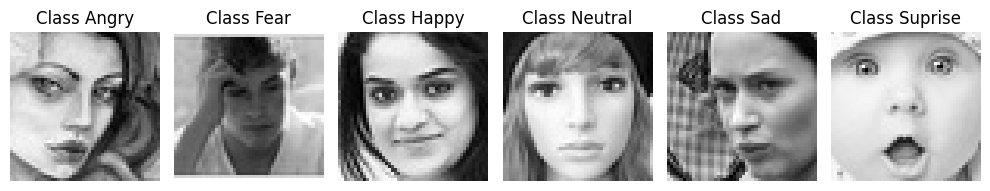

In [4]:
plt.figure(figsize=(10, 5))
idx = 0
for lbl, img_path in visualization.items():
    idx += 1
    img = Image.open(img_path)
    img_bw = img.convert("L")  # Convert the image to black and white (grayscale)
    plt.subplot(1, len(visualization), idx)
    plt.imshow(img_bw, cmap='gray')  # Display the grayscale image
    plt.title(f"Class {lbl}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
augmentation_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  
    transforms.RandomVerticalFlip(),    
    transforms.RandomRotation(10),     
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  
    transforms.RandomResizedCrop(48, scale=(0.8, 1.0), ratio=(0.75, 1.333))  
])

transform = transforms.Compose([
    transforms.ToTensor()
])
train_transform = transforms.Compose([
    augmentation_transform,  # Apply data augmentation
    transforms.ToTensor()    # Convert the image to a tensor
])


train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.125, random_state=42)  # 0.125 * 0.8 = 0.1 (10% of the original data)

train_dataset = CustomDataset(data=train_data, transform=transform)
test_dataset = CustomDataset(data=test_data, transform=transform)
val_dataset = CustomDataset(data=val_data, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, pin_memory=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=True, pin_memory=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True, pin_memory=True, drop_last=True)

In [6]:
print(len(train_dataset))

4946


In [7]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
from train_loop import train_loop

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model_x(in_channels=1, out_channels=6).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.02)
lr_scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.2, patience=3, verbose=True, min_lr=1e-6)
train_loop(epoches = 100, model=model,train_loader=train_loader,device=device, optimizer=optimizer,criterion=criterion,val_loader=val_loader)


c:\Users\kutay\miniconda3\envs\pm\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Epoch 1/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.739909022817523 Train_accuracy:  24.794407894736842
Val_loss:  1.5994192336539736 Val_accuracy:  24.375


Train_loss:  1.7187363053447942 Train_accuracy:  26.70641447368421
Val_loss:  1.6001724394241181 Val_accuracy:  23.75


Epoch 3/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.7075846171118787 Train_accuracy:  27.857730263157894
Val_loss:  1.5928107535484994 Val_accuracy:  24.21875


Train_loss:  1.6977807063107735 Train_accuracy:  28.392269736842106
Val_loss:  1.579014067265404 Val_accuracy:  25.46875


Epoch 5/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.681475999140325 Train_accuracy:  31.31167763157895
Val_loss:  1.552489241582501 Val_accuracy:  31.09375


Train_loss:  1.6599931882741814 Train_accuracy:  34.29276315789474
Val_loss:  1.5478708140415045 Val_accuracy:  29.6875


Epoch 7/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.6381614860907963 Train_accuracy:  36.47203947368421
Val_loss:  1.5201007028280256 Val_accuracy:  36.40625


Train_loss:  1.6214712091269303 Train_accuracy:  38.83634868421053
Val_loss:  1.5081533947287726 Val_accuracy:  37.8125


Epoch 9/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.6082412682705642 Train_accuracy:  39.74095394736842
Val_loss:  1.5054044817933943 Val_accuracy:  37.8125


Train_loss:  1.5997088779768769 Train_accuracy:  41.11842105263158
Val_loss:  1.4840096307778796 Val_accuracy:  40.78125


Epoch 11/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.5910355089359616 Train_accuracy:  41.817434210526315
Val_loss:  1.4997165577415024 Val_accuracy:  37.03125


Train_loss:  1.5813177859209542 Train_accuracy:  42.96875
Val_loss:  1.4890361176184583 Val_accuracy:  39.0625


Epoch 13/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.5769346046679136 Train_accuracy:  43.58552631578947
Val_loss:  1.47893605104093 Val_accuracy:  40.625


Train_loss:  1.5702505115550682 Train_accuracy:  43.70888157894737
Val_loss:  1.4633307126489017 Val_accuracy:  42.03125


Epoch 15/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.5668883364161064 Train_accuracy:  44.42845394736842
Val_loss:  1.4750410670775504 Val_accuracy:  40.15625


Train_loss:  1.5581117993272657 Train_accuracy:  45.1891447368421
Val_loss:  1.4814660963951445 Val_accuracy:  38.90625


Epoch 17/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.5592188266333038 Train_accuracy:  45.1891447368421
Val_loss:  1.4726111858535185 Val_accuracy:  40.46875


Train_loss:  1.5515428196790968 Train_accuracy:  46.05263157894737
Val_loss:  1.4667284154824523 Val_accuracy:  40.9375


Epoch 19/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.5525741361193073 Train_accuracy:  45.703125
Val_loss:  1.465755111931743 Val_accuracy:  40.625


Train_loss:  1.5438929772598755 Train_accuracy:  46.77220394736842
Val_loss:  1.4656289409545726 Val_accuracy:  42.03125


Epoch 21/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.5430478883859748 Train_accuracy:  47.265625
Val_loss:  1.4670896624574568 Val_accuracy:  40.625


Train_loss:  1.5357848467057502 Train_accuracy:  48.026315789473685
Val_loss:  1.4595634104338866 Val_accuracy:  41.875


Epoch 23/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.536479729368192 Train_accuracy:  47.49177631578947
Val_loss:  1.4571732409098193 Val_accuracy:  42.65625


Train_loss:  1.5327346129211106 Train_accuracy:  47.86184210526316
Val_loss:  1.4453939089849275 Val_accuracy:  43.90625


Epoch 25/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.5261198229699109 Train_accuracy:  48.807565789473685
Val_loss:  1.4563083028186328 Val_accuracy:  41.875


Train_loss:  1.5248542782559455 Train_accuracy:  48.60197368421053
Val_loss:  1.4623832864505062 Val_accuracy:  40.9375


Epoch 27/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.517795555031449 Train_accuracy:  49.56825657894737
Val_loss:  1.4478532718296941 Val_accuracy:  42.96875


Train_loss:  1.5140963321844672 Train_accuracy:  50.10279605263158
Val_loss:  1.4714763376972464 Val_accuracy:  40.46875


Epoch 29/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.5110051964537317 Train_accuracy:  50.328947368421055
Val_loss:  1.4697829358479932 Val_accuracy:  40.0


Train_loss:  1.5073854050750053 Train_accuracy:  51.171875
Val_loss:  1.439634417543317 Val_accuracy:  43.59375


Epoch 31/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.5031590012466671 Train_accuracy:  50.98684210526316
Val_loss:  1.464064580547759 Val_accuracy:  41.25


Train_loss:  1.4975087574219539 Train_accuracy:  52.05592105263158
Val_loss:  1.4654973959484396 Val_accuracy:  40.625


Epoch 33/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.4973677570791897 Train_accuracy:  51.8297697368421
Val_loss:  1.465693666709026 Val_accuracy:  42.03125


Train_loss:  1.4936042936813287 Train_accuracy:  51.85032894736842
Val_loss:  1.447042592006829 Val_accuracy:  43.4375


Epoch 35/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.4904743847073787 Train_accuracy:  52.59046052631579
Val_loss:  1.4524495341990253 Val_accuracy:  41.875


Train_loss:  1.4863719176629078 Train_accuracy:  52.89884868421053
Val_loss:  1.445236767198274 Val_accuracy:  43.75


Epoch 37/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.4828368455737986 Train_accuracy:  53.55674342105263
Val_loss:  1.45332362324716 Val_accuracy:  42.5


Train_loss:  1.4817081425192864 Train_accuracy:  53.28947368421053
Val_loss:  1.4453070180588092 Val_accuracy:  43.59375


Epoch 39/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.4789311416323638 Train_accuracy:  53.495065789473685
Val_loss:  1.4419480557151698 Val_accuracy:  44.21875


Train_loss:  1.4751087039094486 Train_accuracy:  53.94736842105263
Val_loss:  1.4461588771879421 Val_accuracy:  43.125


Epoch 41/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.473742098254903 Train_accuracy:  54.33799342105263
Val_loss:  1.4501081410020884 Val_accuracy:  42.96875


Train_loss:  1.4703725991439973 Train_accuracy:  54.72861842105263
Val_loss:  1.443317505055472 Val_accuracy:  43.28125


Epoch 43/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.4713695169796694 Train_accuracy:  54.6875
Val_loss:  1.426813085143266 Val_accuracy:  45.15625


Train_loss:  1.4704455612065384 Train_accuracy:  54.708059210526315
Val_loss:  1.4261126916175852 Val_accuracy:  45.625


Epoch 45/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.4591438580369158 Train_accuracy:  56.14720394736842
Val_loss:  1.4348822651691788 Val_accuracy:  45.0


Train_loss:  1.451683695384765 Train_accuracy:  57.13404605263158
Val_loss:  1.4439728128522256 Val_accuracy:  42.65625


Epoch 47/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.4568804020926 Train_accuracy:  56.04440789473684
Val_loss:  1.4302754489839329 Val_accuracy:  44.84375


Train_loss:  1.4567136105091236 Train_accuracy:  56.06496710526316
Val_loss:  1.435125564078799 Val_accuracy:  44.21875


Epoch 49/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.4496782567401767 Train_accuracy:  57.11348684210526
Val_loss:  1.4318356008138482 Val_accuracy:  44.375


Train_loss:  1.451373200931387 Train_accuracy:  56.99013157894737
Val_loss:  1.435443085018951 Val_accuracy:  44.53125


Epoch 51/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.4447898787619178 Train_accuracy:  57.421875
Val_loss:  1.4441943566566477 Val_accuracy:  43.28125


Train_loss:  1.44456374264419 Train_accuracy:  56.82565789473684
Val_loss:  1.429295649117088 Val_accuracy:  45.625


Epoch 53/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.4427297879846483 Train_accuracy:  57.750822368421055
Val_loss:  1.441156584268918 Val_accuracy:  43.59375


Train_loss:  1.4422781728705172 Train_accuracy:  57.66858552631579
Val_loss:  1.437503474773747 Val_accuracy:  44.375


Epoch 55/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.437390217547758 Train_accuracy:  58.10032894736842
Val_loss:  1.4341387930820146 Val_accuracy:  44.53125


Train_loss:  1.4366809028967933 Train_accuracy:  58.12088815789474
Val_loss:  1.426908587465192 Val_accuracy:  45.625


Epoch 57/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.434388441061906 Train_accuracy:  58.55263157894737
Val_loss:  1.4461775891683057 Val_accuracy:  42.8125


Train_loss:  1.433644700040713 Train_accuracy:  58.69654605263158
Val_loss:  1.4309738785070611 Val_accuracy:  45.15625


Epoch 59/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.4336342262055195 Train_accuracy:  58.55263157894737
Val_loss:  1.43403122617298 Val_accuracy:  45.3125


Train_loss:  1.4242249584082307 Train_accuracy:  59.56003289473684
Val_loss:  1.442289490005083 Val_accuracy:  43.28125


Epoch 61/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.4203094994544598 Train_accuracy:  60.05345394736842
Val_loss:  1.4210123928129421 Val_accuracy:  45.78125


Train_loss:  1.4243068332571853 Train_accuracy:  59.53947368421053
Val_loss:  1.4395631738902825 Val_accuracy:  43.59375


Epoch 63/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.4183856703422353 Train_accuracy:  59.786184210526315
Val_loss:  1.4267413666764277 Val_accuracy:  45.3125


Train_loss:  1.4121346417776834 Train_accuracy:  60.999177631578945
Val_loss:  1.4250307204531139 Val_accuracy:  46.40625


Epoch 65/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.4111229217442915 Train_accuracy:  60.83470394736842
Val_loss:  1.4289532436171213 Val_accuracy:  45.625


Train_loss:  1.4055218756367598 Train_accuracy:  61.51315789473684
Val_loss:  1.4284774154382514 Val_accuracy:  45.15625


Epoch 67/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.413347055301751 Train_accuracy:  60.32072368421053
Val_loss:  1.4274530909860657 Val_accuracy:  45.0


Train_loss:  1.4097069301828893 Train_accuracy:  61.0608552631579
Val_loss:  1.4193069263765803 Val_accuracy:  46.40625


Epoch 69/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.4054151998566944 Train_accuracy:  61.75986842105263
Val_loss:  1.4392996953939954 Val_accuracy:  43.75


Train_loss:  1.404580356522316 Train_accuracy:  61.67763157894737
Val_loss:  1.4126829932400327 Val_accuracy:  47.96875


Epoch 71/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.403405948057379 Train_accuracy:  61.75986842105263
Val_loss:  1.41785043503304 Val_accuracy:  46.5625


Train_loss:  1.3997516932875051 Train_accuracy:  62.00657894736842
Val_loss:  1.416609444409145 Val_accuracy:  45.9375


Epoch 73/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.396354613591436 Train_accuracy:  62.80838815789474
Val_loss:  1.4216165502135454 Val_accuracy:  46.875


Train_loss:  1.3901291942480745 Train_accuracy:  62.93174342105263
Val_loss:  1.4236710047957921 Val_accuracy:  45.9375


Epoch 75/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.392058298841354 Train_accuracy:  63.09621710526316
Val_loss:  1.4160381354907952 Val_accuracy:  46.5625


Train_loss:  1.3851739935097884 Train_accuracy:  63.671875
Val_loss:  1.4327524015218904 Val_accuracy:  44.6875


Epoch 77/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.389850065768898 Train_accuracy:  63.03453947368421
Val_loss:  1.4182385089879663 Val_accuracy:  45.9375


Train_loss:  1.3879861210793365 Train_accuracy:  63.342927631578945
Val_loss:  1.419889717156007 Val_accuracy:  45.46875


Epoch 79/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.3835951160719362 Train_accuracy:  64.00082236842105
Val_loss:  1.4025271792054346 Val_accuracy:  48.125


Train_loss:  1.3883282653339661 Train_accuracy:  63.11677631578947
Val_loss:  1.4094043175941477 Val_accuracy:  47.1875


Epoch 81/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.3818008200726044 Train_accuracy:  64.0625
Val_loss:  1.4193853354015646 Val_accuracy:  46.09375


Train_loss:  1.377753998555493 Train_accuracy:  64.57648026315789
Val_loss:  1.4178751253508441 Val_accuracy:  45.9375


Epoch 83/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.3801472683546758 Train_accuracy:  64.0625
Val_loss:  1.4153077423656846 Val_accuracy:  46.71875


Train_loss:  1.3723593132244254 Train_accuracy:  65.04934210526316
Val_loss:  1.4063151574033659 Val_accuracy:  47.1875


Epoch 85/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.3723770678404899 Train_accuracy:  64.74095394736842
Val_loss:  1.417521518561594 Val_accuracy:  46.71875


Train_loss:  1.3708174011748762 Train_accuracy:  64.94654605263158
Val_loss:  1.4042593215445986 Val_accuracy:  47.96875


Epoch 87/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.367845013129099 Train_accuracy:  65.72779605263158
Val_loss:  1.421327863420759 Val_accuracy:  45.78125


Train_loss:  1.368463913438969 Train_accuracy:  65.625
Val_loss:  1.4053452207141752 Val_accuracy:  48.59375


Epoch 89/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.3651687245690962 Train_accuracy:  65.60444078947368
Val_loss:  1.4188705509083275 Val_accuracy:  46.09375


Train_loss:  1.362784984571655 Train_accuracy:  66.11842105263158
Val_loss:  1.4129550831321274 Val_accuracy:  47.03125


Epoch 91/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.364859899142181 Train_accuracy:  65.60444078947368
Val_loss:  1.4062049790184097 Val_accuracy:  47.96875


Train_loss:  1.3621652173552492 Train_accuracy:  66.20065789473684
Val_loss:  1.4123200844167145 Val_accuracy:  47.1875


Epoch 93/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.3624241756033522 Train_accuracy:  65.89226973684211
Val_loss:  1.4141930737960793 Val_accuracy:  46.40625


Train_loss:  1.355296834104224 Train_accuracy:  66.83799342105263
Val_loss:  1.4126381017531162 Val_accuracy:  46.40625


Epoch 95/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.3525955595085122 Train_accuracy:  67.47532894736842
Val_loss:  1.4117170061383928 Val_accuracy:  47.65625


Train_loss:  1.3534305416713395 Train_accuracy:  67.08470394736842
Val_loss:  1.403955354380304 Val_accuracy:  47.96875


Epoch 97/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.3487087979376484 Train_accuracy:  67.61924342105263
Val_loss:  1.3991741304518985 Val_accuracy:  48.75


Train_loss:  1.3518763942078353 Train_accuracy:  67.08470394736842
Val_loss:  1.414258252781891 Val_accuracy:  47.34375


Epoch 99/100:   0%|          | 0/38 [00:00<?, ?it/s]

Train_loss:  1.3450032722790908 Train_accuracy:  67.68092105263158
Val_loss:  1.4091147459210904 Val_accuracy:  47.8125


Train_loss:  1.3470886730251166 Train_accuracy:  67.7220394736842


Val_loss:  1.4135999450251946 Val_accuracy:  47.96875


The code above reached ~50% accuracy on val set, which is a lot better than random guessing for 6 classes. Now I want to try ensemble of two models. First, the one above, and the second model is a modified vgg19. 

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
from train_loop import train_loop

model.eval()  

total_correct = 0
total_samples = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

accuracy = total_correct / total_samples
print(f"Accuracy on test set: {accuracy:.2%}")

In [8]:
from torch.utils.data import DataLoader, Subset
train_dataset_size = len(train_dataset)
train_dataset_size = len(train_dataset)
split_ratio = 0.5 
first_part_size = int(train_dataset_size * split_ratio)

first_part_indices = list(range(first_part_size))
second_part_indices = list(range(first_part_size, train_dataset_size))

first_part_dataset = Subset(train_dataset, first_part_indices)
second_part_dataset = Subset(train_dataset, second_part_indices)

first_part_loader = DataLoader(first_part_dataset, batch_size=128, shuffle=True, pin_memory=True, drop_last=True)
second_part_loader = DataLoader(second_part_dataset, batch_size=128, shuffle=True, pin_memory=True, drop_last=True)

In [ ]:
transfer_model = model_y(in_channels=1).to(device)
model = model_x(in_channels=1, out_channels=6).to(device)
model2 = model_x(in_channels=1).to(device)
train_loop(epoches = 100, model=transfer_model,train_loader=first_part_loader,device=device, optimizer=optimizer,criterion=criterion,val_loader=val_loader)
train_loop(epoches = 100, model=transfer_model,train_loader=first_part_loader,device=device, optimizer=optimizer,criterion=criterion,val_loader=val_loader)
train_loop(epoches = 100, model=model2,train_loader=second_part_loader,device=device, optimizer=optimizer,criterion=criterion,val_loader=val_loader)


In [ ]:
import torch.nn.functional as F

models = [model, model2, transfer_model]
weights = [0.6, 0.2, 0.2]

correct = 0
total = 0

for images, labels in val_loader:
    images, labels = images.to(device), labels.to(device)
    predictions = []

    
    for model, weight in zip(models, weights):
        model.eval()
        with torch.no_grad():
            output = model(images)
            predictions.append(weight * F.softmax(output, dim=1))  
    ensemble_prediction = torch.stack(predictions).sum(dim=0)


    _, predicted = torch.max(ensemble_prediction, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print('Ensemble Accuracy: {:.2f}%'.format(accuracy))

This part is just an experiment, it does not have a high accuracy